IMPORT LIBRARIES


In [4]:
#import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

CUSTOMER DETAILS

In [4]:
c_data=pd.read_csv('customer_details.csv')
c_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [11]:
c_data.sample(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
637,638,21,Male,Sweater,Clothing,20,Tennessee,M,Cyan,Winter,3.4,Yes,2-Day Shipping,Yes,Yes,46,Cash,Fortnightly
2789,2790,28,Female,Sweater,Clothing,85,North Carolina,L,Orange,Fall,5.0,No,Express,No,No,28,Credit Card,Bi-Weekly
3446,3447,51,Female,Boots,Footwear,55,Louisiana,S,Purple,Spring,5.0,No,2-Day Shipping,No,No,20,Cash,Weekly
1526,1527,41,Male,Jacket,Outerwear,22,Oklahoma,L,White,Summer,3.1,No,Next Day Air,Yes,Yes,27,PayPal,Monthly
2129,2130,40,Male,Skirt,Clothing,57,Minnesota,L,Orange,Fall,2.8,No,Store Pickup,No,No,12,PayPal,Every 3 Months
70,71,22,Male,Belt,Accessories,29,Alabama,M,Magenta,Fall,4.2,Yes,Express,Yes,Yes,32,Debit Card,Every 3 Months
1179,1180,20,Male,T-shirt,Clothing,33,Indiana,M,Blue,Summer,2.8,No,Free Shipping,Yes,Yes,44,Bank Transfer,Annually
3276,3277,39,Female,Scarf,Accessories,99,South Dakota,M,White,Summer,4.0,No,Store Pickup,No,No,41,PayPal,Every 3 Months
2774,2775,56,Female,Boots,Footwear,40,Oklahoma,L,Yellow,Fall,4.1,No,Standard,No,No,42,Credit Card,Quarterly
1789,1790,52,Male,Blouse,Clothing,34,Arizona,L,Peach,Spring,3.0,No,2-Day Shipping,No,No,43,Debit Card,Quarterly


In [13]:
c_data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


CHECK FOR MISSING VALUES

In [15]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

gender distribution of buyers

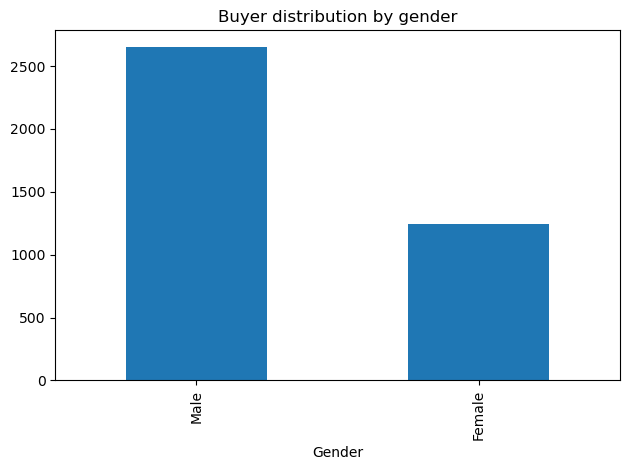

In [18]:
c_data['Gender'].value_counts().plot(kind='bar')
plt.title('Buyer distribution by gender')
plt.tight_layout()
plt.show()

PRODUCT CATEGORY

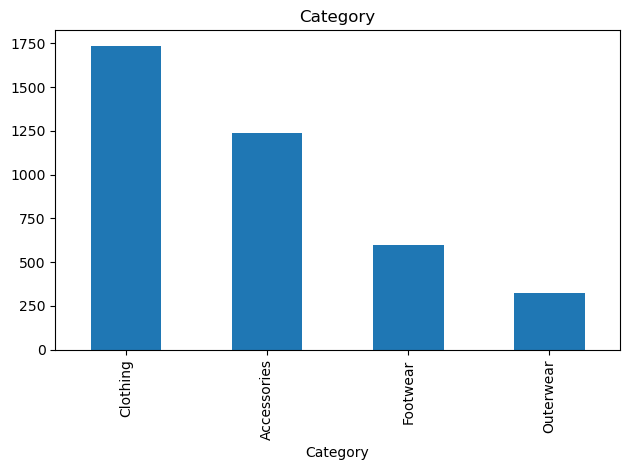

In [20]:
c_data['Category'].value_counts().plot(kind='bar')
plt.title('Category')
plt.tight_layout()
plt.show()

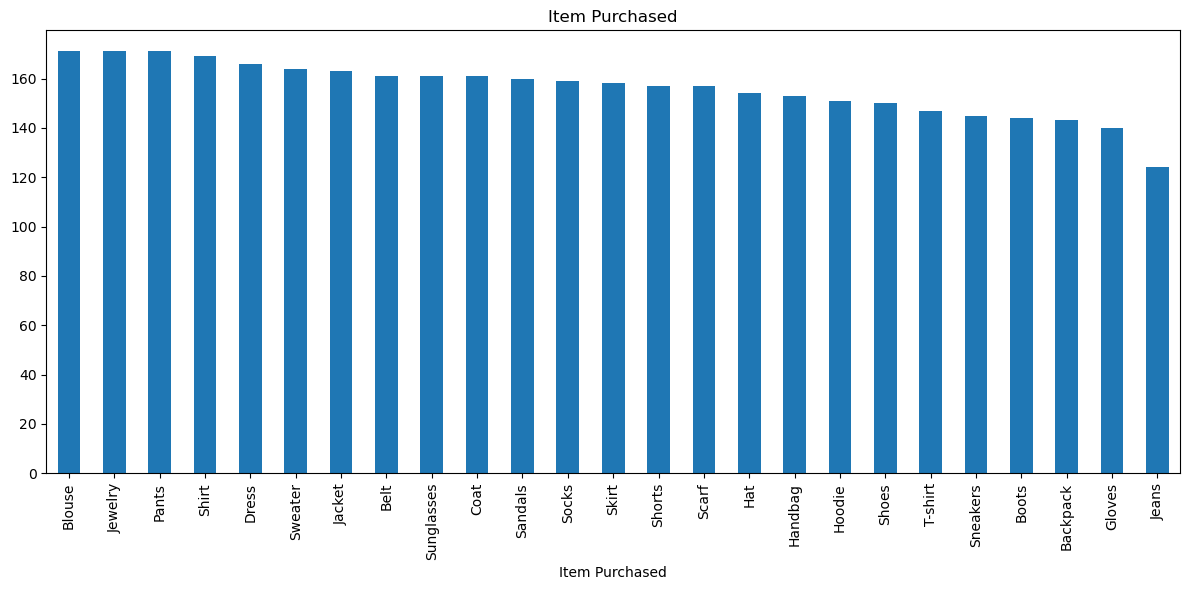

In [28]:
plt.figure(figsize=(12,6))
c_data['Item Purchased'].value_counts().plot(kind='bar')
plt.title('Item Purchased')
plt.tight_layout()
plt.show()

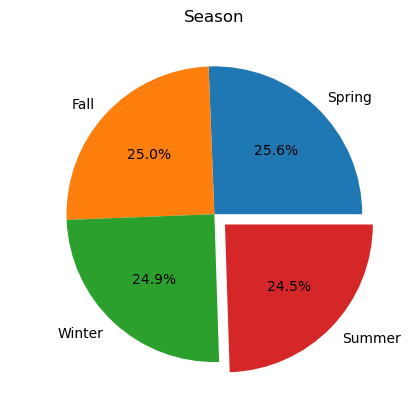

In [30]:
c_data['Season'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['Spring','Fall','Winter','Summer'],explode=[0,0,0,0.1])
plt.ylabel(' ')
plt.title('Season')
plt.show()

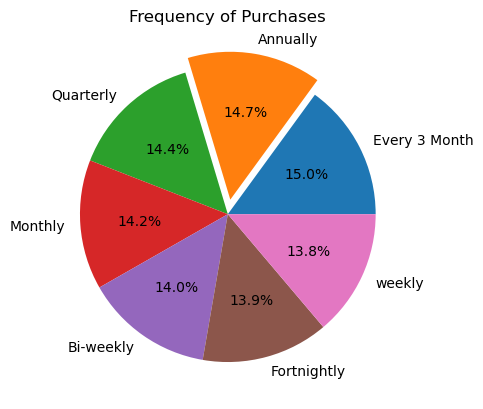

In [7]:
c_data['Frequency of Purchases'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['Every 3 Month','Annually','Quarterly','Monthly','Bi-weekly','Fortnightly','weekly'],explode=[0,0.1,0,0,0,0,0])
plt.ylabel(' ')
plt.title('Frequency of Purchases')
plt.show()

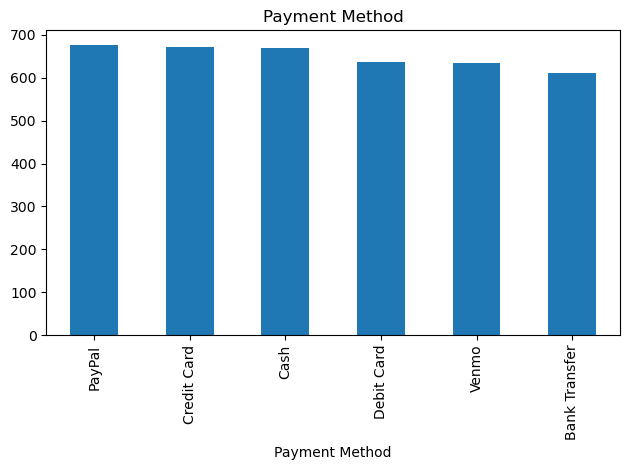

In [34]:
c_data['Payment Method'].value_counts().plot(kind='bar')
plt.title('Payment Method')
plt.tight_layout()
plt.show()

E-COMMERCE DATA SET


In [71]:
e_data=pd.read_csv('ecommerce.csv')
e_data.head()



,user id,product id,Interaction type,Time stamp,Unnamed: 4
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN
3,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN


In [73]:
e_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user id           2999 non-null   float64
 1   product id        2999 non-null   object 
 2   Interaction type  2871 non-null   object 
 3   Time stamp        2999 non-null   object 
 4   Unnamed: 4        0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 128.8+ KB


In [81]:
e_data.isnull().sum()

user id              295
product id           295
Interaction type     423
Time stamp           295
Unnamed: 4          3294
dtype: int64

In [83]:
e_data.dropna()

,user id,product id,Interaction type,Time stamp,Unnamed: 4


In [85]:
e_data['Interaction type'].value_counts()

Interaction type
like        1145
view         871
purchase     855
Name: count, dtype: int64

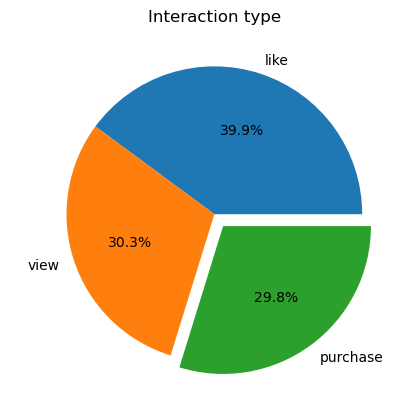

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
e_data['Interaction type'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['like','view','purchase'],explode=[0,0,0.1])
plt.ylabel(' ')
plt.title('Interaction type')
plt.show()

PRODUCT DETAILS


In [43]:
p_data=pd.read_csv('product_details.csv.zip')
p_data.head()

,Uniqe Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [45]:
p_data.sample(10)

,Uniqe Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
6422,d721b859d6fa9ffc912abb305770d650,Ceaco Coming Home - Lakeside Cottage Puzzle (7...,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$11.25,NaN,2927-3,...,https://www.amazon.com/Ceaco-Coming-Home-Lakes...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
5201,a9f8e15ce0dade405dd9e1dff908ef63,Badger Basket Heirloom Style Doll Cradle with ...,NaN,NaN,Toys & Games | Dolls & Accessories | Doll Acce...,NaN,NaN,$43.99,NaN,1835,...,https://www.amazon.com/Badger-Basket-Heirloom-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
9996,0678767f2ff24c5c2330ed0d4456c199,"LEGO 8-Brick Storage Box, Bright Red",NaN,NaN,Toys & Games | Building Toys,NaN,NaN,$24.98,NaN,40041730,...,https://www.amazon.com/LEGO-Storage-Brick-Brig...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3351,7dc7c6204d3948b6cf14c4b871c08cee,Charades DC Comics Riddler Women's Costume,NaN,NaN,"Clothing, Shoes & Jewelry | Costumes & Accesso...",NaN,NaN,$129.99,NaN,NaN,...,https://www.amazon.com/Charades-Riddler-Womens...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3527,084751e00a3758f8a07f9c3efbb99522,"Hot Wheels Wild Racer Beverage Napkins, Party ...",NaN,NaN,Toys & Games | Party Supplies | Party Tablewar...,NaN,NaN,$5.25,NaN,501551,...,https://www.amazon.com/Wheels-Racer-Beverage-N...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
7441,05842bd0f88802fb2992eb6cbcbcd3c9,Creative Converting Birthday Girl Pick Letters...,NaN,NaN,Home & Kitchen | Home Décor | Candles & Holder...,NaN,NaN,$5.53,NaN,101045,...,https://www.amazon.com/Creative-Converting-Bir...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4088,d60e2dbee46897677290fda000fdc968,Creative Converting BB375533 Space Blast 9oz C...,NaN,NaN,Toys & Games | Party Supplies | Party Tablewar...,NaN,NaN,$4.19,NaN,375533,...,https://www.amazon.com/Creative-Converting-BB3...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
6871,db8c943902a200700f69975e4aeb7cb3,T.S. Shure Noah's Ark Magnetic Tin Playset,NaN,NaN,Toys & Games | Dress Up & Pretend Play | Prete...,NaN,NaN,$8.62,NaN,4089,...,https://www.amazon.com/T-S-Shure-Noahs-Magneti...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
9386,6e5ddda27f58bda66dde61765322ae2d,Marvel Avengers Collapsible 2 Pack Storage Cub...,NaN,NaN,"Toys & Games | Kids' Furniture, Décor & Storag...",NaN,NaN,$14.81,NaN,NN240427,...,https://www.amazon.com/Marvel-Avengers-Collaps...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3642,20130432b9dc37e2bcaf6199978ad2ac,LeapFrog LeapStart Preschool Activity Book: Al...,NaN,NaN,Toys & Games | Kids' Electronics | Electronic ...,NaN,NaN,$12.30,NaN,80-21504E,...,https://www.amazon.com/LeapFrog-LeapStart-Pres...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [89]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniqe Id               10002 non-null  object 
 1   Product Name           10002 non-null  object 
 2   Brand Name             0 non-null      float64
 3   Asin                   0 non-null      float64
 4   Category               9172 non-null   object 
 5   Upc Ean Code           34 non-null     object 
 6   List Price             0 non-null      float64
 7   Selling Price          9895 non-null   object 
 8   Quantity               0 non-null      float64
 9   Model Number           8230 non-null   object 
 10  About Product          9729 non-null   object 
 11  Product Specification  8370 non-null   object 
 12  Technical Details      9212 non-null   object 
 13  Shipping Weight        8864 non-null   object 
 14  Product Dimensions     479 non-null    object 
 15  Im

In [91]:
p_data.isnull().sum()

Uniqe Id                     0
Product Name                 0
Brand Name               10002
Asin                     10002
Category                   830
Upc Ean Code              9968
List Price               10002
Selling Price              107
Quantity                 10002
Model Number              1772
About Product              273
Product Specification     1632
Technical Details          790
Shipping Weight           1138
Product Dimensions        9523
Image                        0
Variants                  7524
Sku                      10002
Product Url                  0
Stock                    10002
Product Details          10002
Dimensions               10002
Color                    10002
Ingredients              10002
Direction To Use         10002
Is Amazon Seller             0
Size Quantity Variant    10002
Product Description      10002
dtype: int64

In [93]:
remove_col=['Stock' ,'Product Details'          
,'Dimensions'               
,'Color'                    
,'Ingredients'            
,'Direction To Use','Size Quantity Variant',
            'Product Description','Quantity','List Price','Variants',
           'Brand Name','Asin','Upc Ean Code','Product Dimensions','Image',
            'Product Url','Product Url','Sku',
            'Product Specification','Uniqe Id','Model Number']

In [95]:
p_data=p_data.drop(columns=remove_col)

In [97]:
p_data=p_data.dropna()

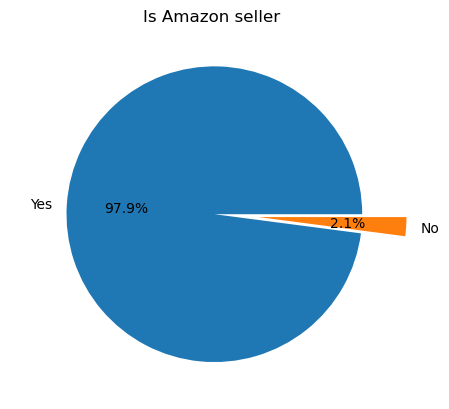

In [99]:
p_data['Is Amazon Seller'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['Yes','No'],explode=[0,0.3])
plt.ylabel(' ')
plt.title('Is Amazon seller ')
plt.show()